In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score, accuracy_score


In [59]:
data0 = pd.read_csv('creditcard.csv')

In [55]:
data0.shape

(284807, 31)

In [4]:
d = data0[data0['Class']==0]
d

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [56]:
data0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
data0 = data0.drop(columns=['Time'])

In [7]:
print(data0.shape)

(284807, 30)


In [61]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

Somme des valeurs nulls

In [62]:
data0.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


Data shape

In [10]:
data0.shape

(284807, 30)

In [63]:
data = data0.copy()

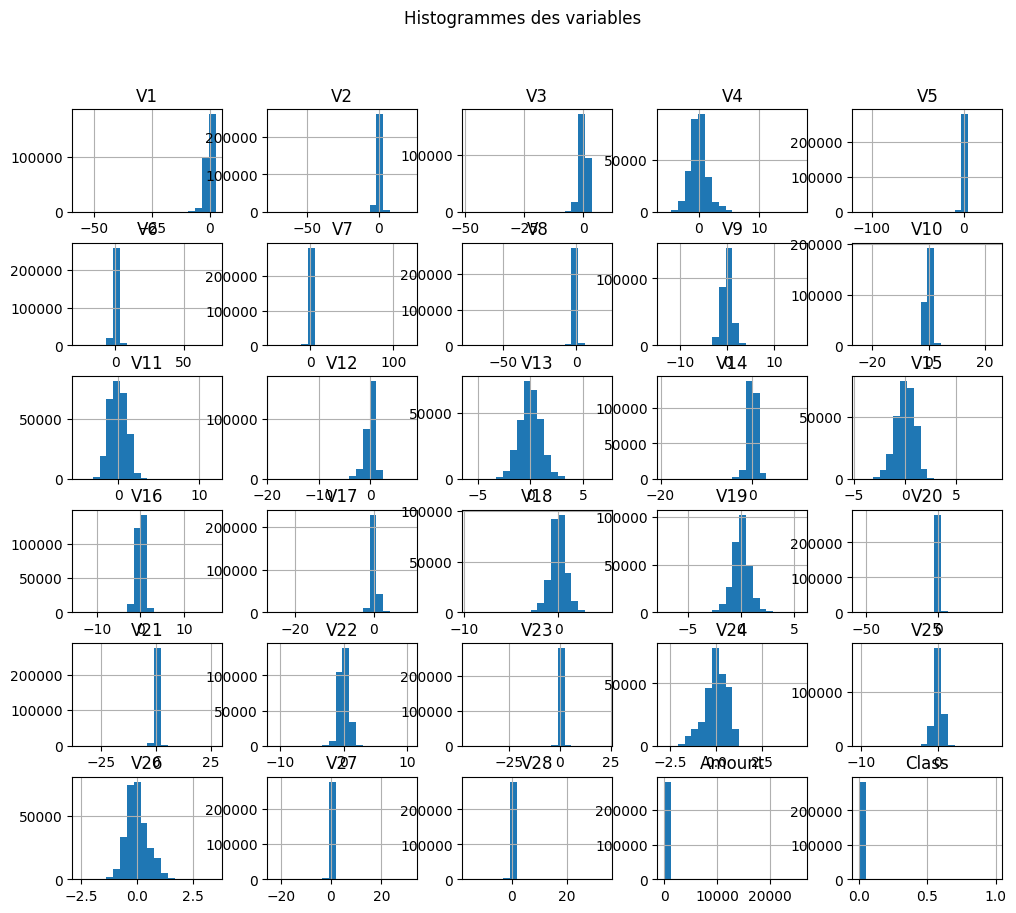

<ipython-input-64-0f36fba2f7f1>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Class'], shade=True, color='b')


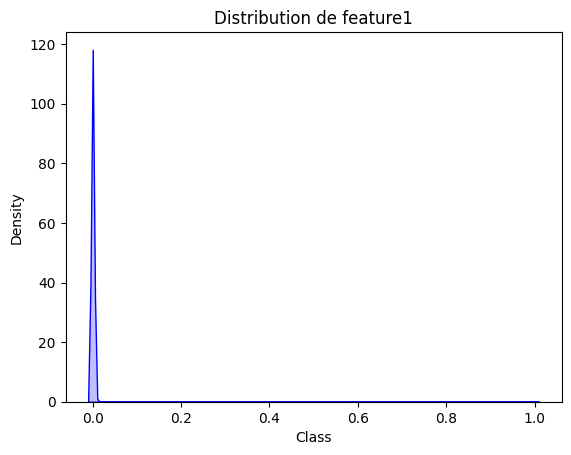

In [64]:
# Histogrammes et KDE pour chaque variable
data.select_dtypes(include=['float64', 'int64']).hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogrammes des variables")
plt.show()
#KDE
sns.kdeplot(data['Class'], shade=True, color='b')
plt.title("Distribution de feature1")
plt.show()

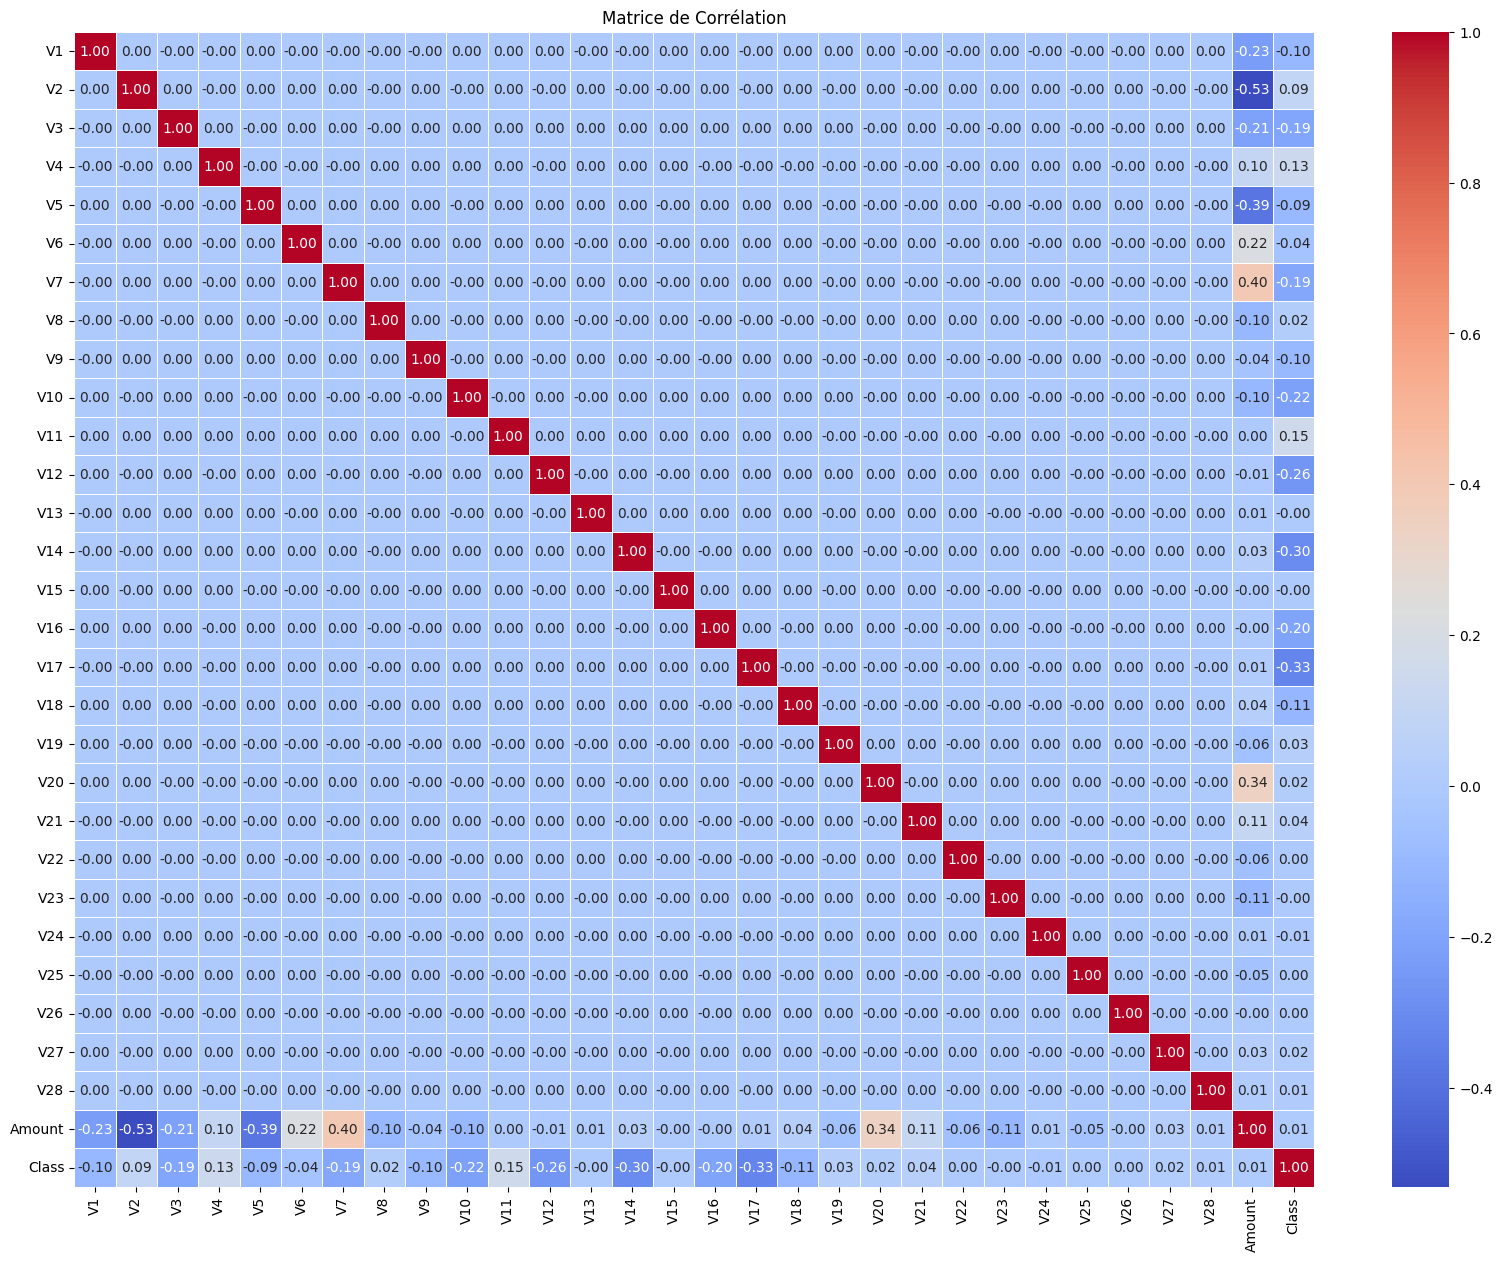

In [65]:
#matrice de corrélation
corr_matrix = data.corr()

#matrice de corrélation sous forme de heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

Séparation de la target

In [66]:
X = data.drop(columns=['Class'])
y = data['Class']

In [67]:
#Standardisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [68]:
#Split en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [69]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (199364, 29)
y_train shape: (199364,)


In [70]:
#calcule des poids des classes
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

#les poids des classes
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(class_weight_dict)


{0: 0.5008642347502763, 1: 289.7732558139535}


In [71]:
class_weights

array([  0.50086423, 289.77325581])

In [72]:
#le modèle
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  #sigmoid pour la classification binaire
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
#résumé du modèle
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
#Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [76]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [77]:
#Entraînement
history = model.fit(X_train, y_train,
                    validation_split=0.2,  # Validation split de 20%
                    epochs=10,  # Nombre d'époques
                    batch_size=32,  # Taille du lot
                    class_weight={0: 0.50, 1: 290},
                    verbose=1)  # Poids des classes

Epoch 1/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9768 - loss: 0.7844 - val_accuracy: 0.9876 - val_loss: 0.0755
Epoch 2/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9828 - loss: 0.1511 - val_accuracy: 0.9890 - val_loss: 0.0738
Epoch 3/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9844 - loss: 0.1058 - val_accuracy: 0.9876 - val_loss: 0.0836
Epoch 4/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9836 - loss: 0.1129 - val_accuracy: 0.9831 - val_loss: 0.0688
Epoch 5/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9705 - loss: 0.1760 - val_accuracy: 0.9902 - val_loss: 0.0395
Epoch 6/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9894 - loss: 0.1252 - val_accuracy: 0.9855 - val_loss: 0.0560
Epoch 7/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9783 - loss: 0.1141 - val_accuracy: 0.9849 - val_loss: 0.0522
Epoch 8/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9817 - loss: 0

In [78]:
#evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9919 - loss: 0.0306
Test Loss: 0.029315993189811707, Test Accuracy: 0.9923340678215027


In [79]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred >= 0.5).astype("int32")

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [80]:
#Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

accuracy_rn = accuracy_score(y_test, y_pred_classes)
f1_rn = f1_score(y_test, y_pred_classes)
recall_rn = recall_score(y_test, y_pred_classes)

Confusion Matrix:
[[84666   629]
 [   26   122]]


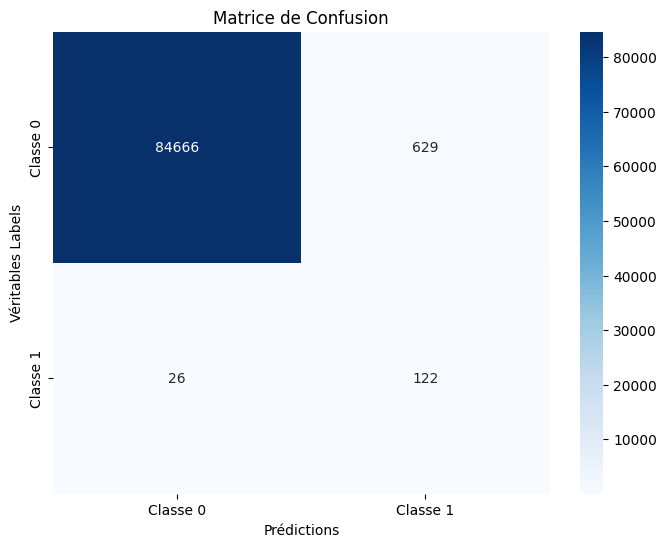

In [81]:
#Plot de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables Labels")
plt.show()

In [82]:
#construire un arbre de décision
dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=10,
                            class_weight='balanced',  # Gérer le déséquilibre
                            random_state=42)

# Entraîner l'arbre
dt.fit(X_train, y_train)

#prédictions
y_pred_ar = dt.predict(X_test)

#évaluation
arbre_confusion_matrix = confusion_matrix(y_test, y_pred_ar)
print("Confusion Matrix:")
print(arbre_confusion_matrix)

Confusion Matrix:
[[85064   231]
 [   32   116]]


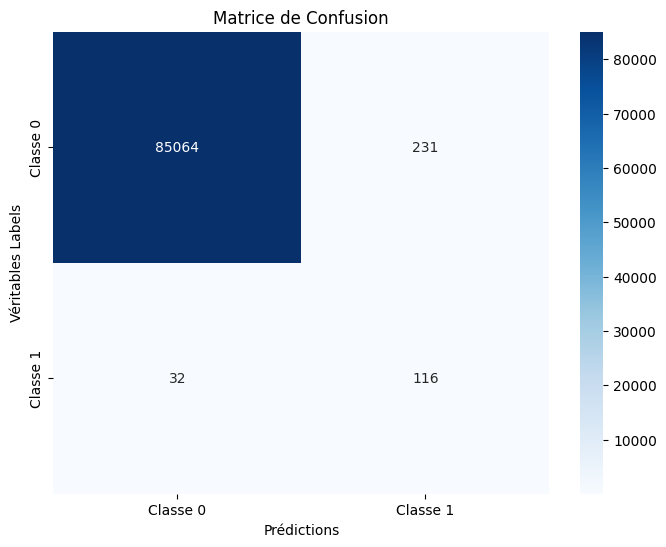

In [83]:
#plot de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(arbre_confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables Labels")
plt.show()

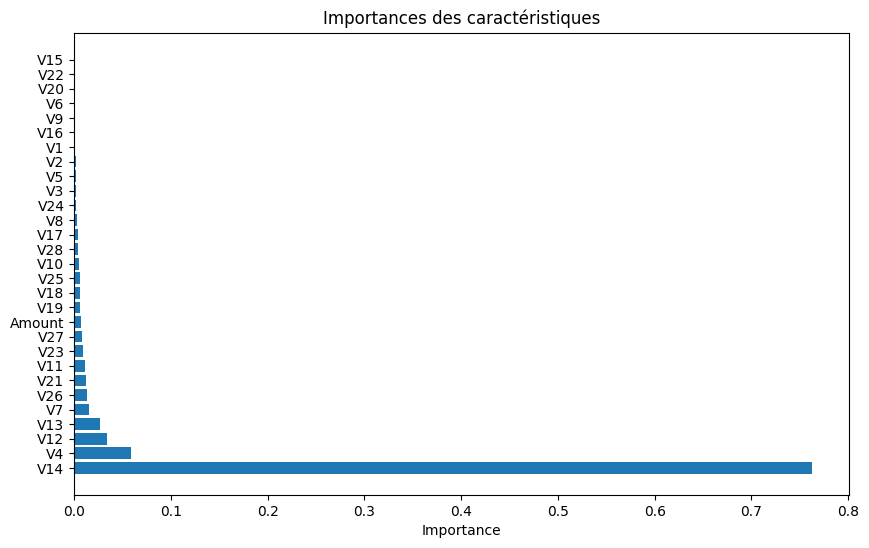

In [84]:
#extraire les importances des caractéristiques
importances_ar = dt.feature_importances_

#trier les caractéristiques par importance
indices = np.argsort(importances_ar)[::-1]

#Tracer les importances des caractéristiques
plt.figure(figsize=(10, 6))
plt.title('Importances des caractéristiques')
plt.barh(range(X_train.shape[1]), importances_ar[indices], align='center')
plt.yticks(range(X_train.shape[1]), [data.columns[i] for i in indices])  # Remplacer df.columns par vos colonnes
plt.xlabel('Importance')
plt.show()


In [85]:
accuracy_ar = accuracy_score(y_test, y_pred_ar)
f1_ar = f1_score(y_test, y_pred_ar)
recall_ar = recall_score(y_test, y_pred_ar)

# Évaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


In [86]:
#construire un modèle Random Forest
rf = RandomForestClassifier(n_estimators=100,  # Nombre d'arbres
                            criterion='gini',  # Critère pour la division des nœuds
                            max_depth=10,  # Profondeur maximale de chaque arbre
                            class_weight='balanced',  # Gérer le déséquilibre
                            random_state=42)

#Entraînement
rf.fit(X_train, y_train)

#Prédictions
y_pred_rf = rf.predict(X_test)





accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

In [37]:
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(rf_confusion_matrix)

Confusion Matrix:
[[85273    22]
 [   34   114]]


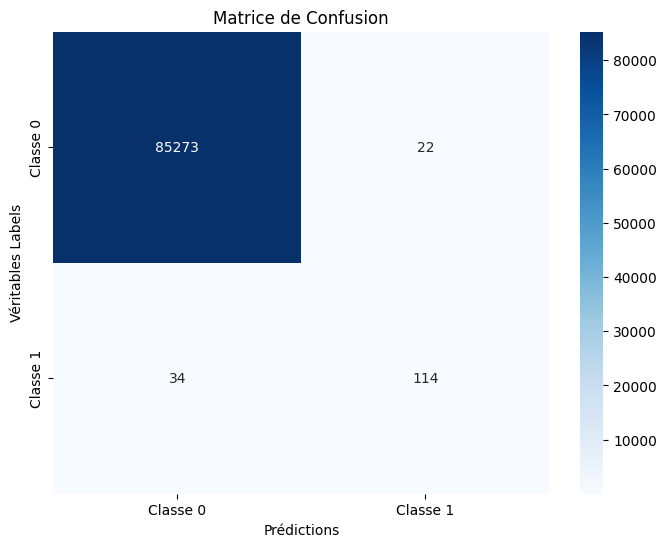

In [87]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables Labels")
plt.show()

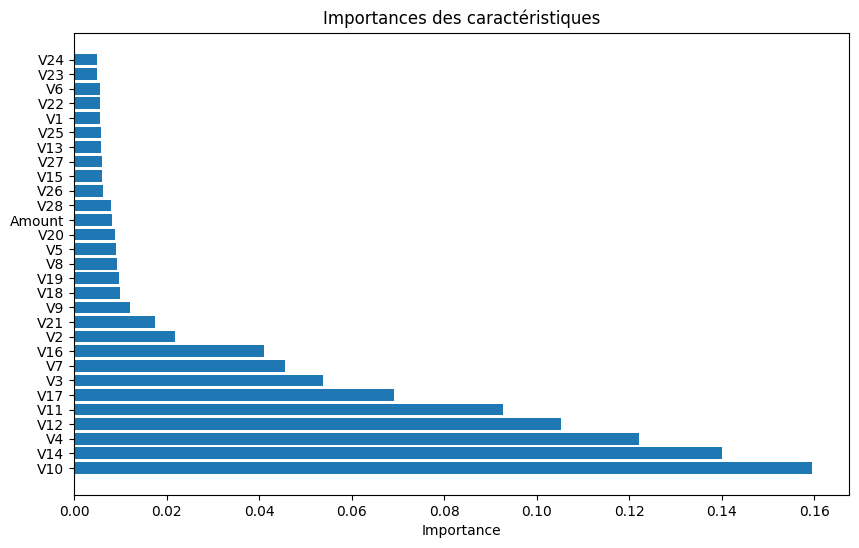

In [88]:
importances_rf = rf.feature_importances_

#trier les caractéristiques par importance
indices = np.argsort(importances_rf)[::-1]

# Tracer les importances des caractéristiques
plt.figure(figsize=(10, 6))
plt.title('Importances des caractéristiques')
plt.barh(range(X_train.shape[1]), importances_rf[indices], align='center')
plt.yticks(range(X_train.shape[1]), [data.columns[i] for i in indices])  # Remplacer df.columns par vos colonnes
plt.xlabel('Importance')
plt.show()


# **Comparaison**


Résumé des performances des modèles :

              Modèle  Accuracy  F1 Score    Recall
0                 RN  0.992334  0.271413  0.824324
1  Arbre de décision  0.996922  0.468687  0.783784
2      Random Forest  0.999345  0.802817  0.770270


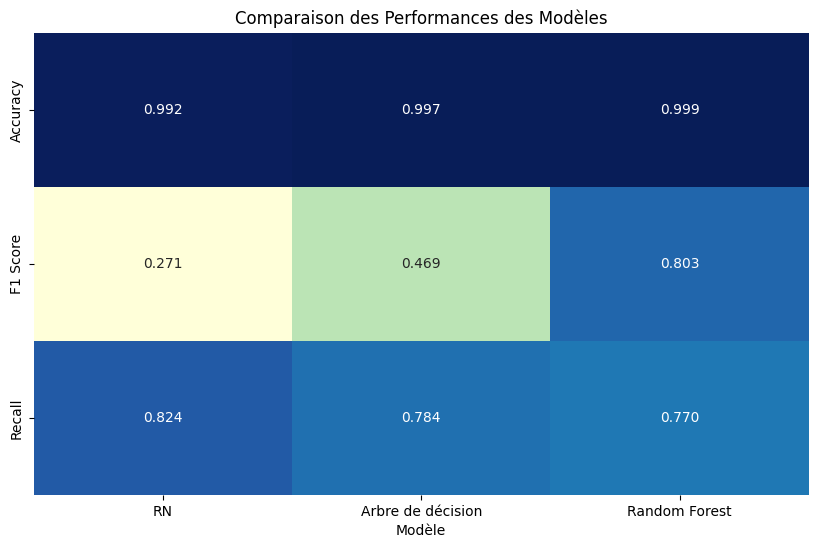

In [89]:
#résumé des performances de chaque modèle dans un DataFrame
results = pd.DataFrame({
    "Modèle": ["RN", "Arbre de décision", "Random Forest"],
    "Accuracy": [accuracy_rn, accuracy_ar, accuracy],
    "F1 Score": [f1_rn, f1_ar, f1],
    "Recall": [recall_rn, recall_ar, recall]
})

#le tableau des résultats
print("\nRésumé des performances des modèles :\n")
print(results)


plt.figure(figsize=(10, 6))
sns.heatmap(results.set_index("Modèle").T, annot=True, cmap="YlGnBu", fmt=".3f", cbar=False)
plt.title("Comparaison des Performances des Modèles")
plt.show()
